https://colab.research.google.com/drive/1LIY39nAsFtkIuizpl2-ChknYtSg-o6a6#scrollTo=Sq2Ydni3sb7l

Общий анализ рынка вакансий​: Для выявления наиболее популярных площадок по поиску вакансий использовались данные google-поиск, яндекс-wordstat.​

По результатам на графике видим, что самой охватывающей площадкой является hh.ru, занимая долю от 82%.​

​

В связи с этим для анализа берется hh.ru​

​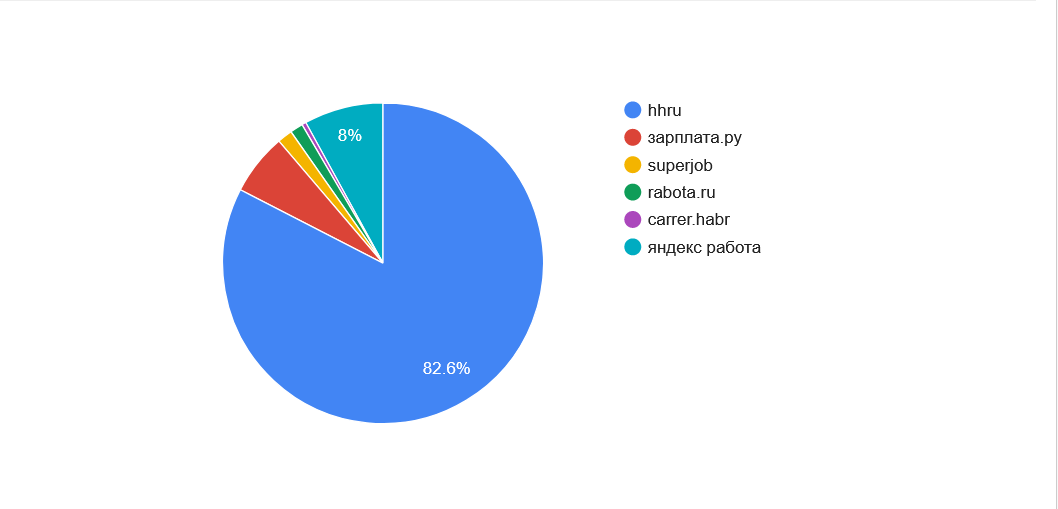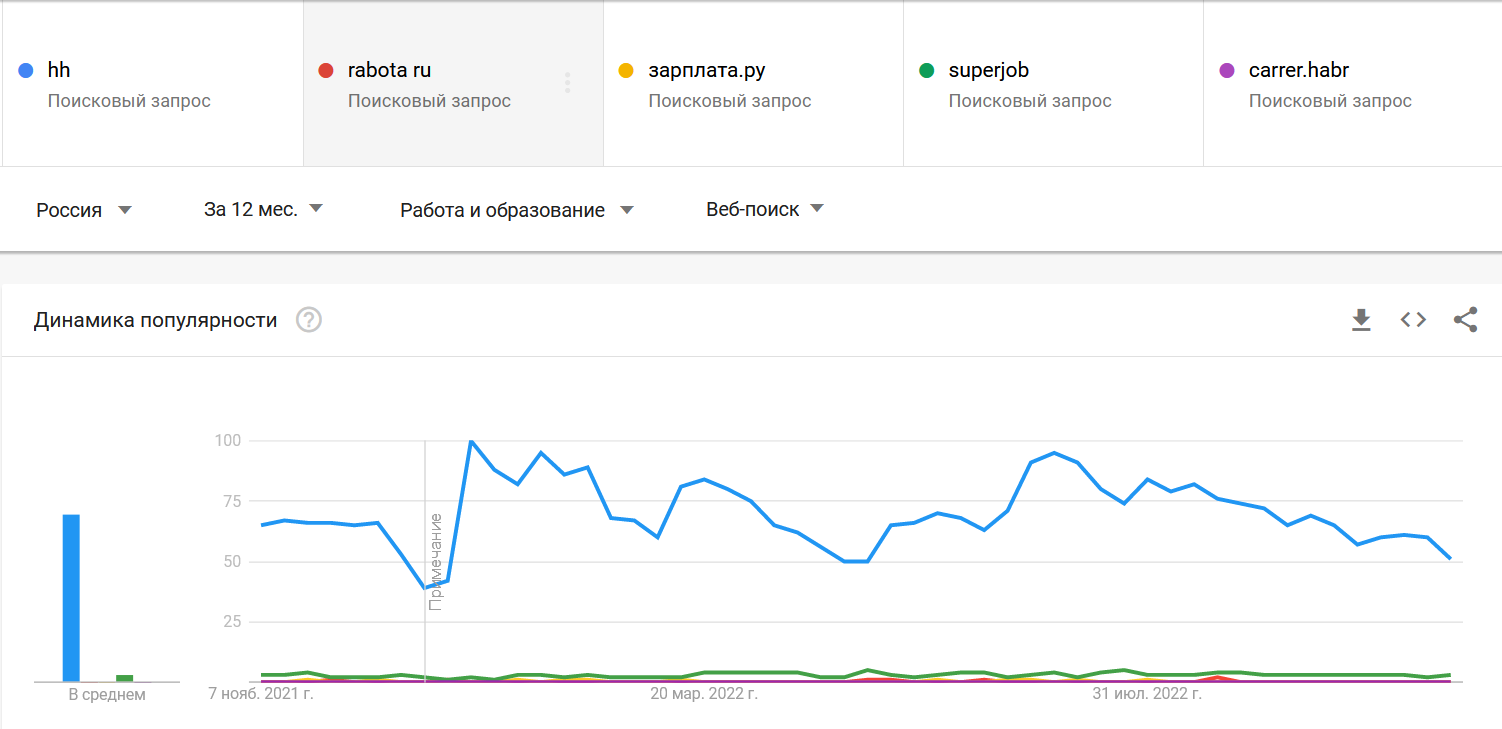

In [38]:
import requests
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import plotly.express as px
import folium

Часть 1. Парсер вакансий по специальностям "Data" с hh.

In [ ]:
job_title = ['Data']
page = 1
num_per_page = 100
area = 113
url = f'https://api.hh.ru/vacancies?text={job_title}&page={page}&per_page={num_per_page}&area={area}'

In [ ]:
url = f'https://api.hh.ru/vacancies'
params = {
    'text':job_title,
    'page':page,
    'per_page':num_per_page,
    'area':area
}
res = requests.get(url, params=params)

In [ ]:
res = requests.get(url)

In [ ]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

100

In [ ]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [ ]:
vnum  = vacancies.get('pages')

In [ ]:
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?text={job_title}&page={page}&per_page={num_per_page}&area={area}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
vacs = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacs.append(res.json())

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
res = requests.get(url)

In [ ]:
df = pd.json_normalize(vacs)

In [ ]:
df.head()

id premium relations                      name  insider_interview  \
0  71201963   False        []             Data-аналитик                NaN   
1  72176810   False        []         Data инженер (ML)                NaN   
2  72126277   False        []  Стажер-аналитик Big Data                NaN   
3  71484837   False        []            Data scientist                NaN   
4  72063378   False        []              Data Analyst                NaN   

  response_letter_required  salary allow_messages  department  contacts  ...  \
0                    False     NaN          False         NaN       NaN  ...   
1                    False     NaN           True         NaN       NaN  ...   
2                    False     NaN           True         NaN       NaN  ...   
3                    False     NaN           True         NaN       NaN  ...   
4                    False     NaN          False         NaN       NaN  ...   

  salary.to salary.currency  salary.gross address.metro test.required  \
0       NaN             NaN           NaN           NaN           NaN   
1       NaN             NaN           NaN           NaN           NaN   
2       NaN             NaN           NaN           NaN           NaN   
3       NaN             NaN           NaN           NaN           NaN   
4       NaN             NaN           NaN           NaN           NaN   

  employer.logo_urls insider_interview.id  insider_interview.url errors  \
0                NaN                  NaN                    NaN    NaN   
1                NaN                  NaN                    NaN    NaN   
2                NaN                  NaN                    NaN    NaN   
3                NaN                  NaN                    NaN    NaN   
4                NaN                  NaN                    NaN    NaN   

  request_id  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 89 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 89 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4000 non-null   object 
 1   premium                       4000 non-null   object 
 2   relations                     4000 non-null   object 
 3   name                          4000 non-null   object 
 4   insider_interview             0 non-null      float64
 5   response_letter_required      4000 non-null   object 
 6   salary                        0 non-null      float64
 7   allow_messages                4000 non-null   object 
 8   department                    0 non-null      float64
 9   contacts                      0 non-null      float64
 10  description                   4000 non-null   object 
 11  branded_description           2040 non-null   object 
 12  vacancy_constructor_template  0 non-null      float64
 13  ke

In [ ]:
cols = [0,1,2,4,5,6,7,8,9,11,12,14,15,16,17,18,19,20,21,22,23,24,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,56,57,58,59,60,62,64,66,68,69,70,71,72,73,74,75,76,77,80,81,82,83,84,85,86,87,88] 
df.drop (df.columns [cols], axis= 1 , inplace= True )

Часть 2. Анализ датасета. 

In [ ]:
from google.colab import files
df.to_csv('dfsave.csv') 
files.download('dfsave.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('dfsave(6).csv')


Saving dfsave(6).csv to dfsave(6) (1).csv


In [4]:
df.head()

Unnamed: 0                      name  \
0           0             Data-аналитик   
1           1         Data инженер (ML)   
2           2  Стажер-аналитик Big Data   
3           3            Data scientist   
4           4              Data Analyst   

                                         description  \
0  <p><strong>АО «Элемент 5 Нефтегаз» динамично р...   
1  <p>Наша команда создает информационную платфор...   
2  <p><strong>Компания IBS, ключевой технологичес...   
3  <strong>Обязанности:</strong> <p>• Разработка,...   
4  <p>В Отделе бизнес-аналитики и финансового пла...   

                                          key_skills  \
0  [{'name': 'MS PowerPoint'}, {'name': 'Управлен...   
1  [{'name': 'Hadoop'}, {'name': 'SQL'}, {'name':...   
2  [{'name': 'SQL'}, {'name': 'BPMN'}, {'name': '...   
3  [{'name': 'Python'}, {'name': 'Git'}, {'name':...   
4                                                 []   

               published_at                created_at        area.name  \
0  2022-11-13T09:40:07+0300  2022-11-13T09:40:07+0300           Москва   
1  2022-11-10T14:15:30+0300  2022-11-10T14:15:30+0300           Москва   
2  2022-11-09T14:05:43+0300  2022-11-09T14:05:43+0300  Нижний Новгород   
3  2022-11-11T17:57:08+0300  2022-11-11T17:57:08+0300  Санкт-Петербург   
4  2022-11-08T11:59:03+0300  2022-11-08T11:59:03+0300  Нижний Новгород   

   address.metro.station_id     experience.name     schedule.name  \
0                     6.210  От 1 года до 3 лет       Полный день   
1                     6.740  От 1 года до 3 лет  Удаленная работа   
2                    50.278           Нет опыта       Полный день   
3                       NaN  От 1 года до 3 лет  Удаленная работа   
4                       NaN  От 1 года до 3 лет       Полный день   

    employment.name       employer.name  salary.from  salary.to  
0  Полная занятость  Элемент 5 Нефтегаз          NaN        NaN  
1  Полная занятость     Bell Integrator          NaN        NaN  
2  Полная занятость                 IBS          NaN        NaN  
3  Полная занятость        585, Холдинг          NaN        NaN  
4  Полная занятость                СБЕР          NaN        NaN

In [5]:
df = df.fillna(0)

In [6]:
df = df[df.name != 0]
df['name'].value_counts()

Data Engineer                                                                  560
Senior Data Scientist                                                          200
Data Scientist                                                                 160
Data engineer                                                                  160
Data Analyst                                                                   120
                                                                              ... 
Аналитик данных/data analyst (IT продукт для фарм.компаний)                     40
Media Insights analyst / Специалист по анализу данных о потребителе в медиа     40
Data инженер (ML)                                                               40
Data Engineer (Big Data)                                                        40
Бизнес системный аналитик направления процессов внутреннего учета               40
Name: name, Length: 70, dtype: int64

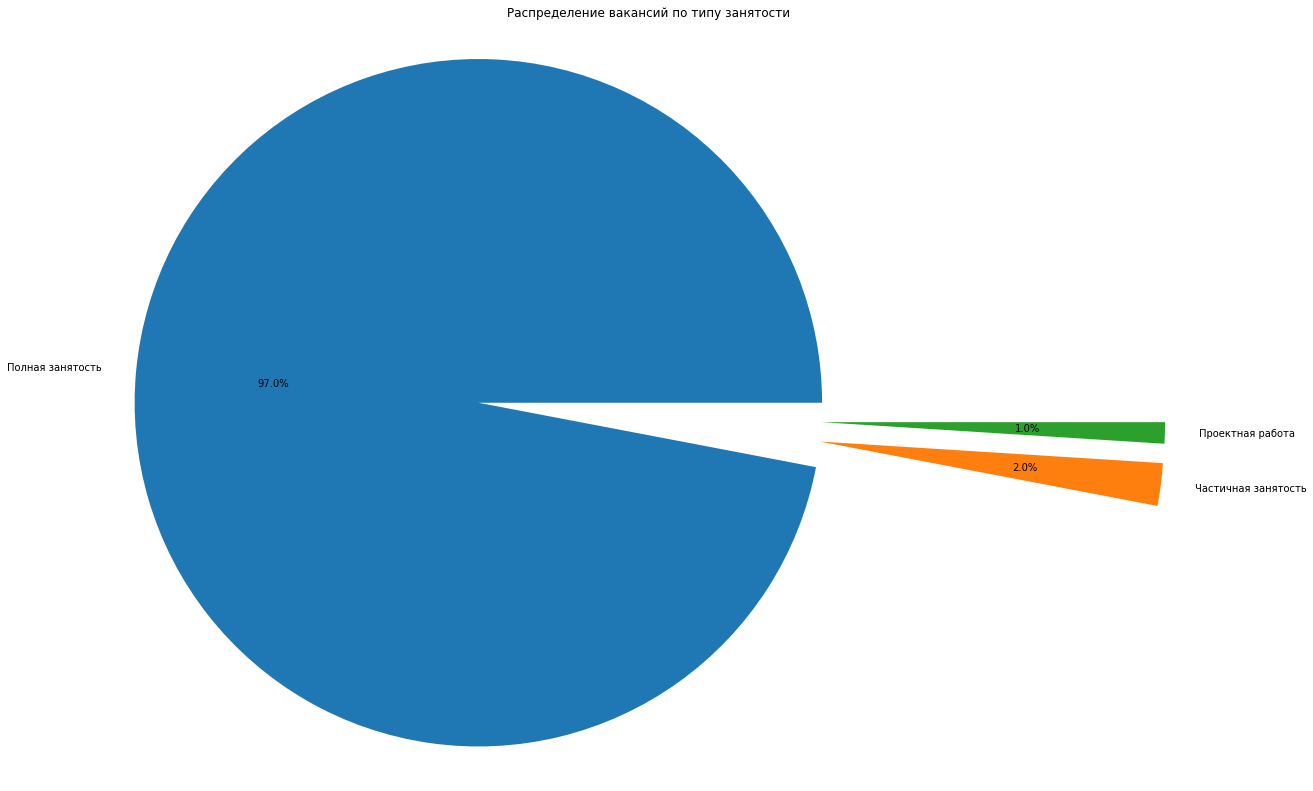

In [7]:
labels = [x for x in df['employment.name'].unique()]
sizes = df['employment.name'].value_counts().reset_index()['employment.name']
explode = [0.4, 0.6, 0.6]
fig, ax = plt.subplots(figsize =(20, 14))
ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Распределение вакансий по типу занятости')
plt.show()

По полученным данным 97% представлены постоянной занятостью, компаниям необходим штатный сотрудник. 2% - частичная занятость и 1% проектная работа - показатели относительно небольшие, полагаю связано с неопределенностью на рынке труда в РФ, компаниям требуется постоянный сотрудник. Расстраивает отсутствие варианта стажировки - организации не готовы тратить деньги на взращивание студентов до необходимого уровня.

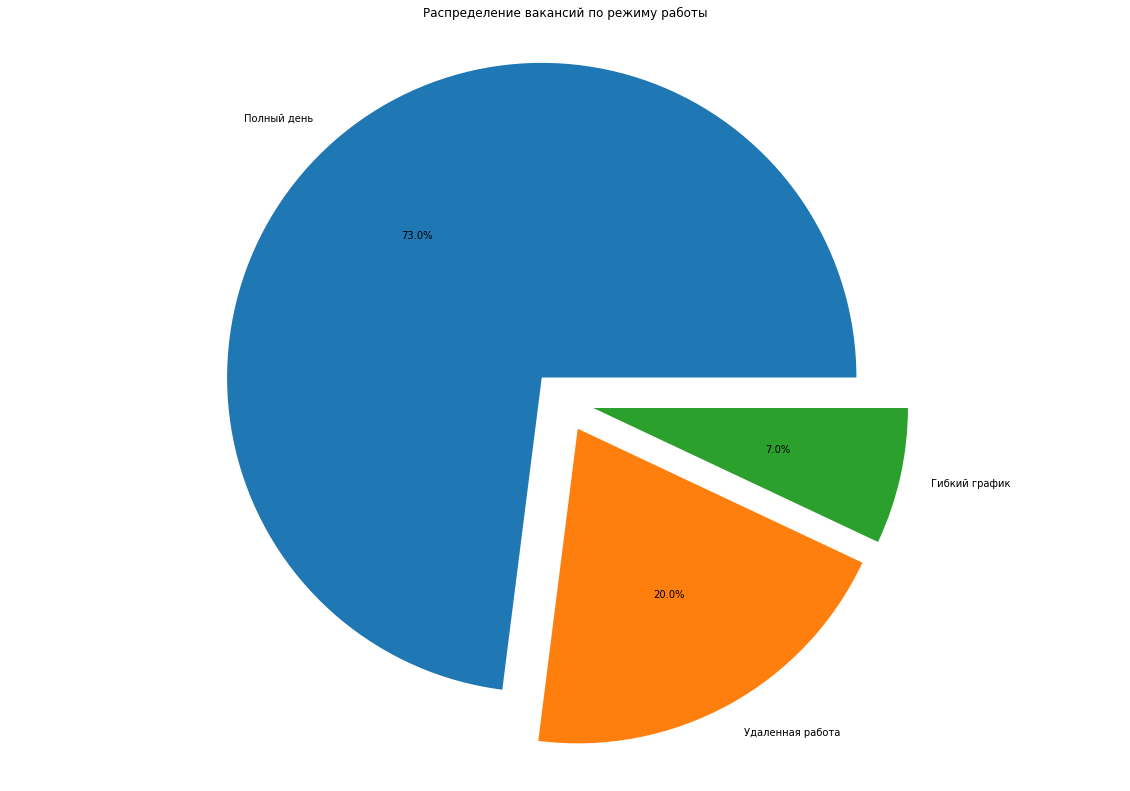

In [8]:
labels = [x for x in df['schedule.name'].unique()]
sizes = df['schedule.name'].value_counts().reset_index()['schedule.name']
explode = [0.1, 0.1, 0.1]
fig, ax = plt.subplots(figsize =(20, 14))
ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Распределение вакансий по режиму работы')
plt.show()

73% работодателей требуют от будущих сотрудников Data трудиться полный день, 20% предлагают возможность удаленной работы и только 7% готовы предложить гибкий график работы.

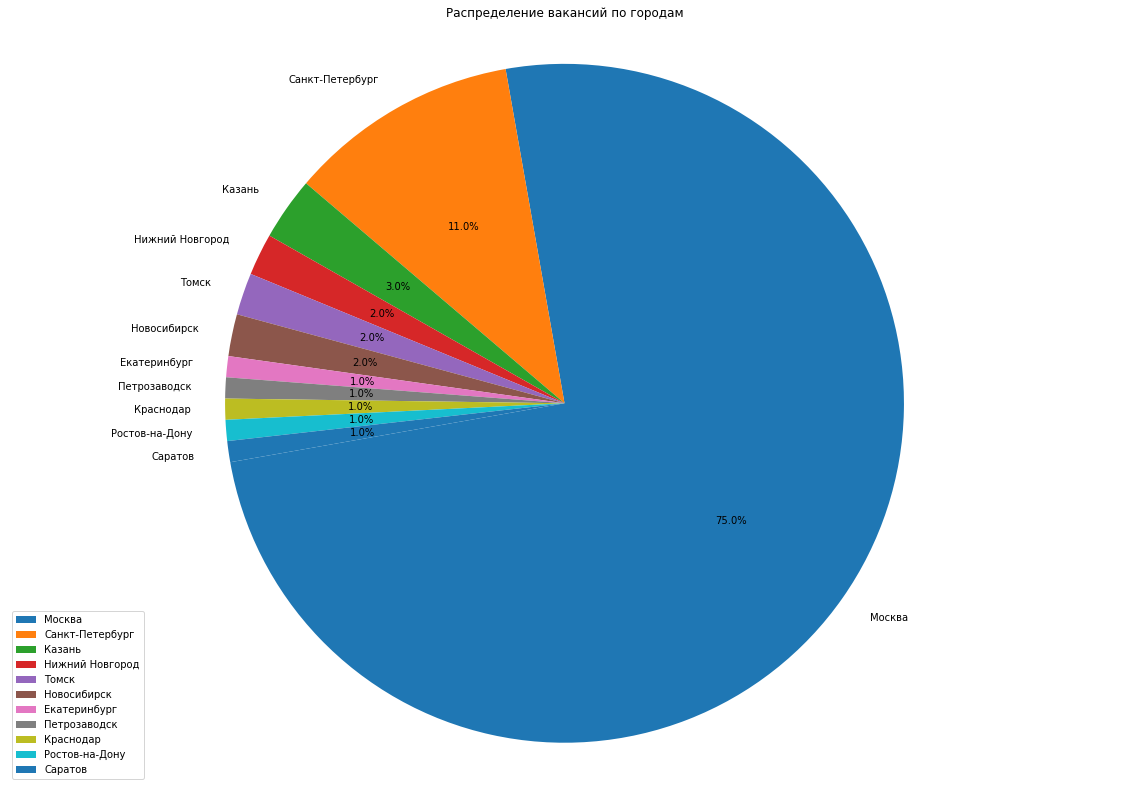

In [9]:
# Распределение вакансий по городам
labels = ['Москва', 'Санкт-Петербург', 'Казань', 'Нижний Новгород', 'Томск', 'Новосибирск', 'Екатеринбург', 'Петрозаводск', 'Краснодар', 'Ростов-на-Дону', 'Саратов']
sizes = df['area.name'].value_counts().reset_index()['area.name']
fig, ax = plt.subplots(figsize =(20, 14))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=190)
ax.axis('equal')
ax.legend(labels, loc='lower left')
plt.title('Распределение вакансий по городам')
plt.show()

Как мы видим из представленного графика наибольшее количество вакансий представлено в г.Москва - 75% от общего предложения вакансий, что логично - головные компании располагаются в столице, дата-центры и т.д. стараются держать в непосредственной близости. На 2 месте - Санкт-Петербург - 11%, полагаю связано с тем, что в Санкт-Петербурге ценник на услуги IT специалистов ниже чем в Москве, плюс расположен в непосредственной близости от Москвы и в том же часовом поясе.

In [10]:
def latitude(row):
    if ('Москва' in row['area.name']):
        return '55.751944'
    if ('Санкт-Петербург' in row['area.name']):
        return '59.937055'
    if ('Казань' in row['area.name']):
        return '55.789631'
    if ('Нижний Новгород' in row['area.name']):
        return '56.333867'
    if ('Томск' in row['area.name']):
        return '56.494489'
    if ('Новосибирск' in row['area.name']):
        return '54.960169'
    if ('Екатеринбург' in row['area.name']):
        return '56.830393'
    if ('Петрозаводск' in row['area.name']):
        return '61.757977'
    if ('Краснодар' in row['area.name']):
        return '45.084229'
    if ('Ростов-на-Дону' in row['area.name']):
        return '47.256369'
    if ('Саратов' in row['area.name']):
        return '51.558225'

In [11]:
df['latitude'] = df.apply(lambda row: latitude(row), axis=1)

In [12]:
def longitude(row):
    if ('Москва' in row['area.name']):
        return '37.624887'
    if ('Санкт-Петербург' in row['area.name']):
        return '30.368098'
    if ('Казань' in row['area.name']):
        return '49.127837'
    if ('Нижний Новгород' in row['area.name']):
        return '44.011789'
    if ('Томск' in row['area.name']):
        return '84.985846'
    if ('Новосибирск' in row['area.name']):
        return '82.871113'
    if ('Екатеринбург' in row['area.name']):
        return '60.605695'
    if ('Петрозаводск' in row['area.name']):
        return '34.388359'
    if ('Краснодар' in row['area.name']):
        return '38.964650'
    if ('Ростов-на-Дону' in row['area.name']):
        return '39.703572'
    if ('Саратов' in row['area.name']):
        return '46.009204'

In [13]:
df['longitude'] = df.apply(lambda row: longitude(row), axis=1)

In [39]:
latitude = df['latitude']
longitude = df['longitude']
name = df['area.name']

map = folium.Map(location=[64.6863136, 97.7453061], zoom_start = 4, tiles = 'Stamen Terrain')

for latitude, longitude, name in zip(latitude, longitude, name):
    folium.Marker(location=[latitude, longitude], popup=df['area.name'].value_counts(), icon=folium.Icon(color = 'gray')).add_to(map)

map

In [ ]:
df_skil = df[df['key_skills'] != 0]

In [ ]:
skills = df_skil['key_skills']

In [ ]:
df_skil['key_skills']

0       [{'name': 'MS PowerPoint'}, {'name': 'Управлен...
1       [{'name': 'Hadoop'}, {'name': 'SQL'}, {'name':...
2       [{'name': 'SQL'}, {'name': 'BPMN'}, {'name': '...
3       [{'name': 'Python'}, {'name': 'Git'}, {'name':...
4                                                      []
                              ...                        
3995    [{'name': 'Python'}, {'name': 'Hadoop'}, {'nam...
3996    [{'name': 'Python'}, {'name': 'ClickHouse'}, {...
3997    [{'name': 'SQL'}, {'name': 'DWH'}, {'name': 'E...
3998    [{'name': 'Spark'}, {'name': 'Hadoop'}, {'name...
3999    [{'name': 'Системный анализ'}, {'name': 'Agile...
Name: key_skills, Length: 4000, dtype: object

In [ ]:
brand=[]
for i in skills.keys():
  if len(skills[i])> 0: 
    brand.append(skills[i])

In [ ]:
i=0
j=0
work=[]

In [ ]:
while i<len(brand):
  while j<len(brand[i]):
    work.append(brand[i][j].get('name'))
  #  print(q[i][j])
    j+=1
  j=0
  i+=1

In [ ]:
len(work)

21840

In [ ]:
z=pd.DataFrame({'Skill':[], 'count':[]})

In [ ]:
i=0 
while i<len(work):
  new_row={'Skill':work[i],'count':work.count(work[i])}
  z=z.append(new_row, ignore_index=True)
  i+=1

In [ ]:
zz=z.drop_duplicates().sort_values('count',ascending=False)

In [ ]:
topsk = zz.iloc[0:15, :]

In [ ]:
fig = px.pie(topsk, values='count', names='Skill',
             color ='Skill', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  sort=False)
fig.update_layout(width=1500, height=600)
fig.show()

Наиболее востребованные скилы в data-сфере это sql, python - упоминающиеся в 2600 вакансиях из 4000, на 3 месте - big data - 760 вакансий.

Добавляем колонку по типу вакансии. (дата инженер, аналитик, саентист)

In [ ]:
def typeofvac(row):
    if ('анали' in row['name'].lower())|('analy' in row['name'].lower()):
        return 'Data Analyst'
    if ('инж' in row['name'].lower())|('engi' in row['name'].lower())|('architect' in row['name'].lower())|('архитектор' in row['name'].lower()):
        return 'Data Engineer'
    if ('scien' in row['name'].lower())|('исследовател' in row['name'].lower())|('researcher' in row['name'].lower())|('саент' in row['name'].lower()):
        return 'Data Scientist'

In [ ]:
df['type_of_vacancy'] = df.apply(lambda row: typeofvac(row), axis=1)

Добавляем колонку по грейдам (джун/мид/сеньор/лид)

In [ ]:
def grade(row):
    if ('junior' in row['name'].lower())|('джун' in row['name'].lower())|('младший' in row['name'].lower())|('новичок' in row['name'].lower())|('начинающ' in row['name'].lower()):
        return 'Junior'
    if ('middle' in row['name'].lower())|('мидл' in row['name'].lower())|('миддл' in row['name'].lower())|('средний' in row['name'].lower())|('midle' in row['name'].lower()):
        return 'Middle'
    if ('senior' in row['name'].lower())|('старший' in row['name'].lower())|('сеньор' in row['name'].lower())|('синьор' in row['name'].lower()):
        return 'Senior'
    if ('chief' in row['name'].lower())|('head' in row['name'].lower())|('lead' in row['name'].lower())|('руководитель' in row['name'].lower())|('директор' in row['name'].lower()):
        return 'Lead'

In [ ]:
df['grade'] = df.apply(lambda row: grade(row), axis=1)

In [ ]:
df_grades = df.fillna(0)
df_gradess = df_grades[df_grades.grade != 0]
df_j = df_gradess[df_gradess.grade == 'Junior']
df_m = df_gradess[df_gradess.grade == 'Middle']
df_s = df_gradess[df_gradess.grade == 'Senior']
df_s = df_s[df_s.type_of_vacancy != 0]
df_l = df_gradess[df_gradess.grade == 'Lead']
df_l = df_l[df_l.type_of_vacancy != 0]

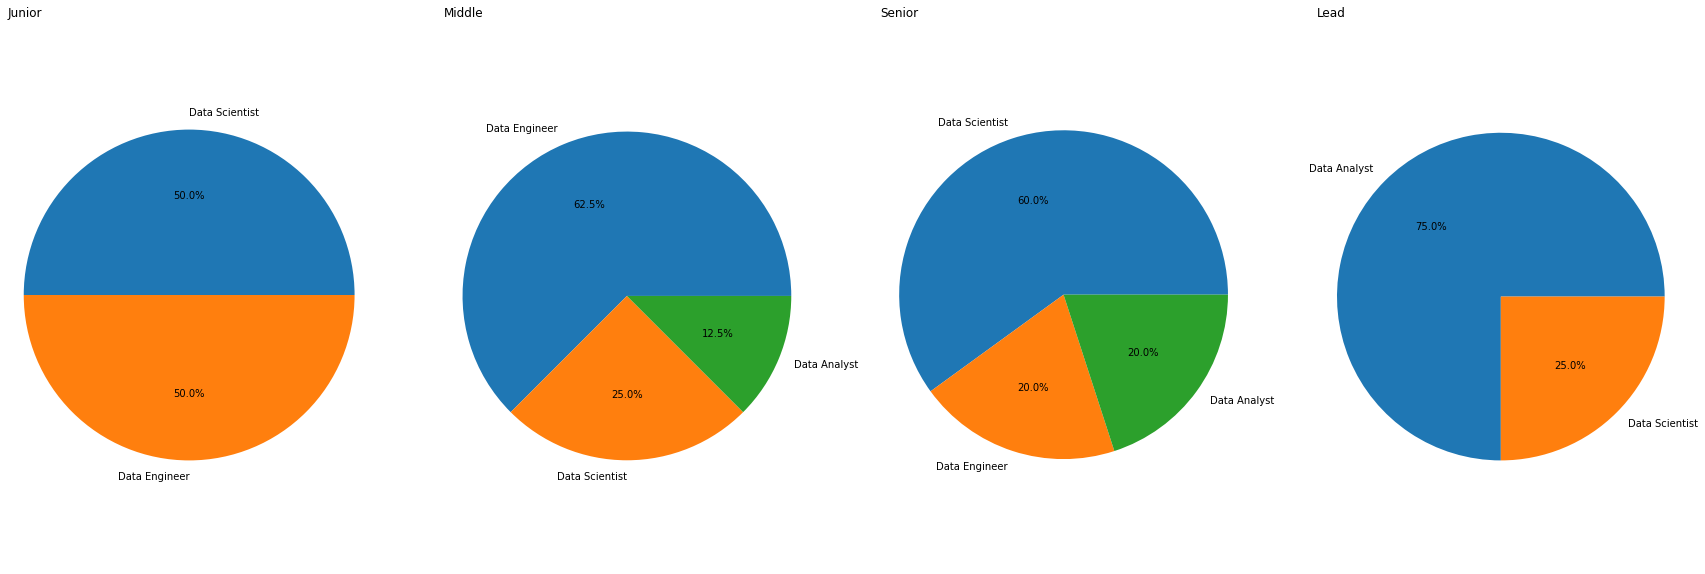

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 10))
labels = [x for x in df_j['type_of_vacancy'].unique()]
sizes = df_j['type_of_vacancy'].value_counts().reset_index()['type_of_vacancy']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Junior', size=12, loc='left')

labels = ['Data Engineer', 'Data Scientist', 'Data Analyst']
sizes = df_m['type_of_vacancy'].value_counts().reset_index()['type_of_vacancy']
ax2.pie(sizes, labels=labels, autopct='%1.1f%%')
ax2.axis('equal')
ax2.set_title('Middle', size=12, loc='left')

labels = ['Data Scientist', 'Data Engineer', 'Data Analyst']
sizes = df_s['type_of_vacancy'].value_counts().reset_index()['type_of_vacancy']
ax3.pie(sizes, labels=labels, autopct='%1.1f%%')
ax3.axis('equal')
ax3.set_title('Senior', size=12, loc='left')

labels = [x for x in df_l['type_of_vacancy'].unique()]
sizes = df_l['type_of_vacancy'].value_counts().reset_index()['type_of_vacancy']
ax4.pie(sizes, labels=labels, autopct='%1.1f%%')
ax4.axis('equal')
ax4.set_title('Lead', size=12, loc='left')

plt.show()

Спрос на джунов в дата аналитике по данным выборки отсутствует, в отличие от Data Science и Engineer, поэтому при желании стать аналитиком, стоит начать с инжиниринга или разработки и потом постепенно перекатываться. 
Также, обращая внимание на то, что инженера и аналитики преобладают среди вакансий, то, возможно, сейчас появилось понимание, что data science команда состоит из разных ролей, и набирать одних саентистов без инженеров и аналитиков не так эффективно.

In [ ]:
df_sal = df[df['salary.from'] != 0]

Text(0.5, 1.0, 'Зарплата в сфере Data в разрезе специальностей')

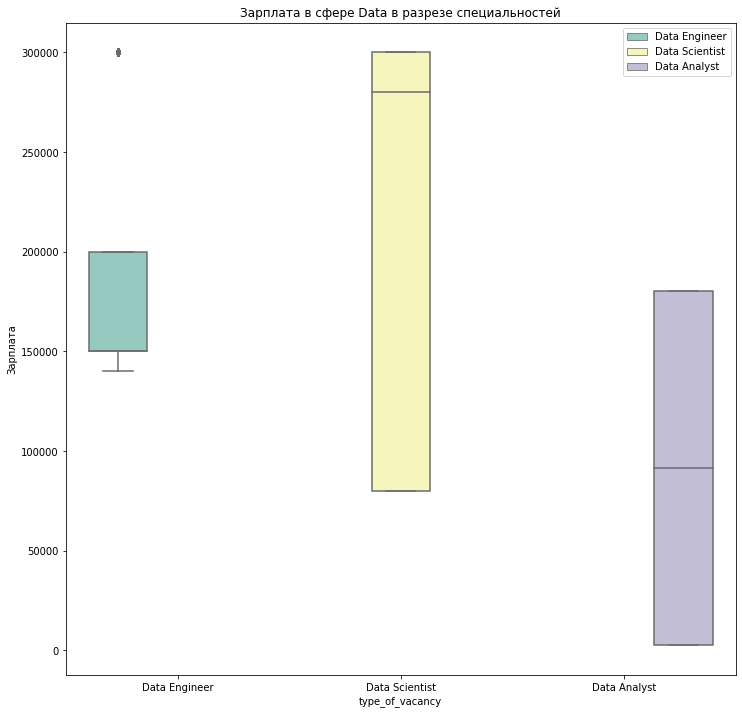

In [ ]:
plt.figure(figsize=(12, 12))
ax = sns.boxplot(data = df_sal , x = 'type_of_vacancy' , y = 'salary.from' , hue = 'type_of_vacancy', palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Зарплата')
plt.title('Зарплата в сфере Data в разрезе специальностей')

Data analyst зарабатывают немного меньше, чем инженеры, при этом лидирующие позиции по зарплате занимают вакансии Data Science. Глядя на зарплату инженеров и бОльшую представленность вакансий на рынке труда, можно совместить приятное с полезным на пути к должности Дата аналитика - и обширный рынок и высокие зарплаты.